In [1]:
import torch
# from torch.autograd import Variable
# import torch.nn.functional as F
import matplotlib.pyplot as plt

In [30]:
# 创建假数据
n_data = torch.ones(100,2)
x0 = torch.normal(2*n_data, 1)
y0 = torch.zeros(100)
x1 = torch.normal(-2*n_data, 1)
y1 = torch.ones(100)

x = torch.cat((x0, x1), 0).type(torch.FloatTensor)  # FloatTensor = 32-bit floating
y = torch.cat((y0, y1), ).type(torch.LongTensor)    # LongTensor = 64-bit integer

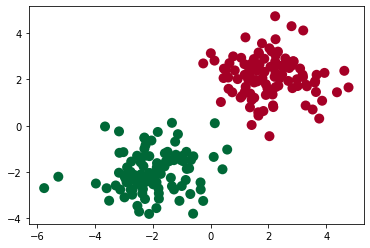

In [31]:
plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=y.data.numpy(), s=100, lw=0, cmap='RdYlGn')
plt.show()

In [26]:
# 定义网络, 继承 Module 模块:
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()  # madantory
        
        # 搭建图
        self.hidden = torch.nn.Linear(n_feature, n_hidden)
        self.predict = torch.nn.Linear(n_hidden, n_output)
    
    def forward(self, x):
        # 搭建前向计算过程
        x = torch.relu(self.hidden(x))  # in: n_features, out: n_hidden
        x = self.predict(x)             # in: n_hidden, out: n_output
        return x

In [35]:
# 创建实例
net = Net(2, 10, 2)  # n_feature: 2, n_hidden: 10, n_output: 2(2 classes)
print(net)  # net architecture

Net(
  (hidden): Linear(in_features=2, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=2, bias=True)
)


In [36]:
# 定义优化器与损失函数
optimizer = torch.optim.SGD(net.parameters(), lr=0.01)
loss_func = torch.nn.CrossEntropyLoss()  # 交叉熵误差

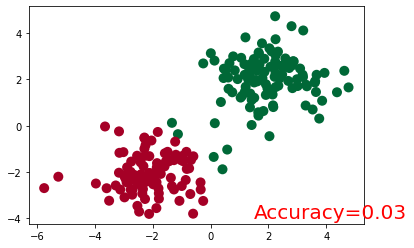

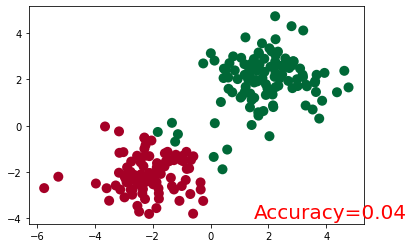

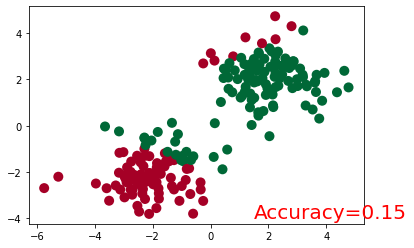

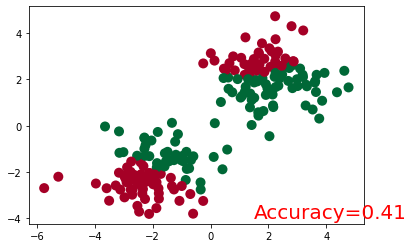

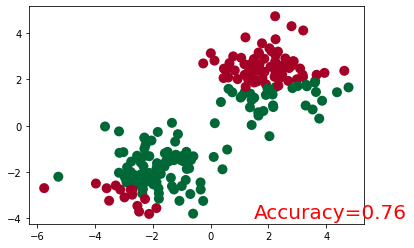

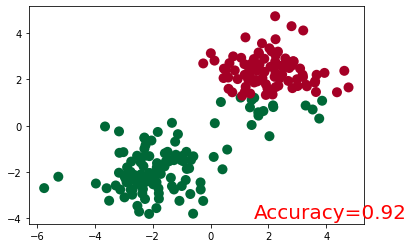

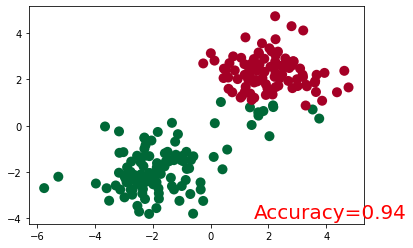

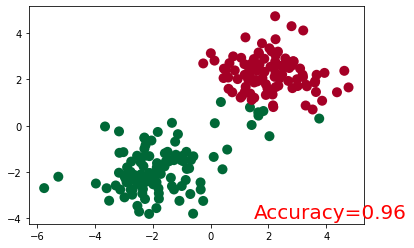

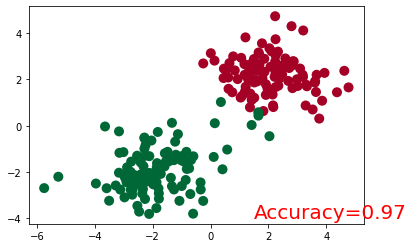

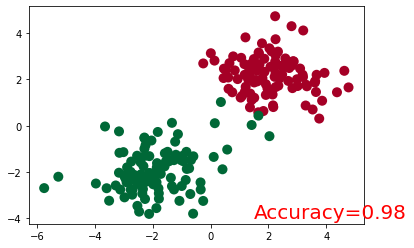

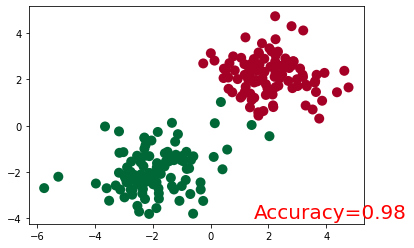

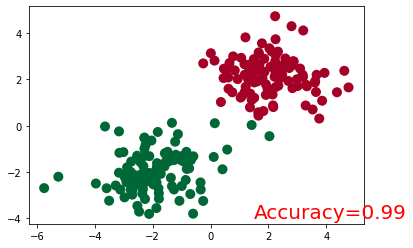

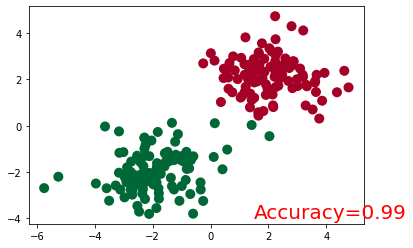

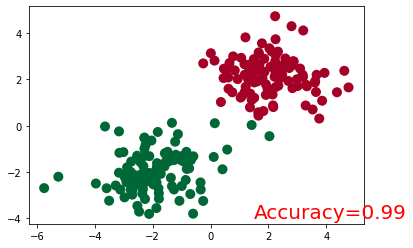

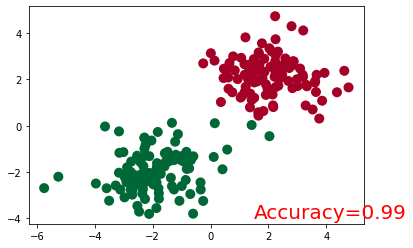

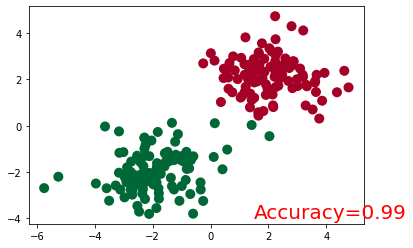

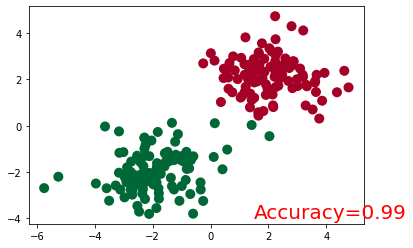

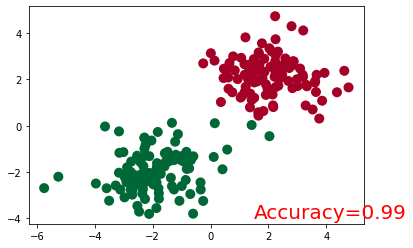

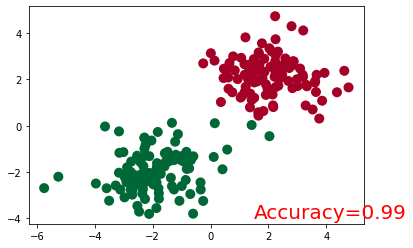

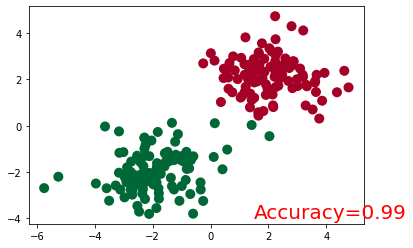

In [37]:
plt.ion()   # something about plotting

# 训练网络
for t in range(100):
    out = net(x)
    
    loss = loss_func(out, y)  # y 一定要在后
    
    optimizer.zero_grad()  # 梯度置零
    loss.backward()  # 梯度反响传播
    optimizer.step()  # 优化梯度
    
    if t % 5 == 0:
        # plot and show learning process
        plt.cla()
        prediction = torch.max(out, 1)[1]  # 最大的位置则为预测值
        pred_y = prediction.data.numpy()
        target_y = y.data.numpy()
        plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=pred_y, s=100, lw=0, cmap='RdYlGn')
        accuracy = float((pred_y == target_y).astype(int).sum()) / float(target_y.size)
        plt.text(1.5, -4, 'Accuracy=%.2f' % accuracy, fontdict={'size': 20, 'color':  'red'})
        plt.pause(0.1)

plt.ioff()
plt.show()